
Quantum Image Encoding Circuit:


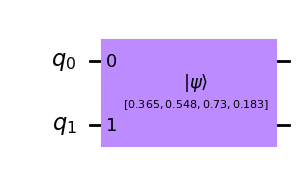


Statevector after Quantum Encoding:


Matrix([
[0.3651],
[0.5477],
[0.7303],
[0.1826]])

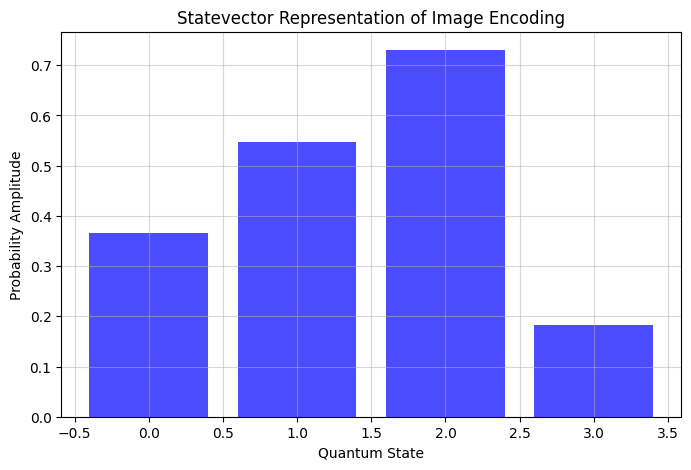

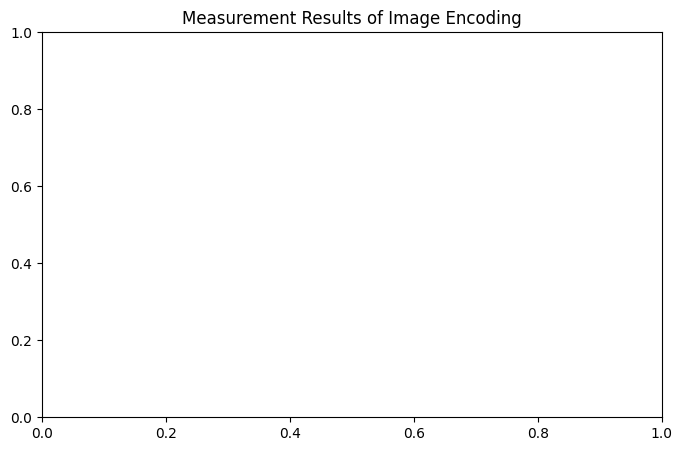

In [1]:
#-------------------------------------------------------------------------
# Quantum Encoding a Simple Image with Visualization
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import circuit_drawer, plot_histogram
#-------------------------------------------------------------------------

def sprint(Matrix, decimals=4):
    """ Prints a Matrix with real and imaginary parts rounded to 'decimals' """
    import sympy as sp
    SMatrix = sp.Matrix(Matrix)  # Convert to Sympy Matrix if it's not already

    def round_complex(x):
        """Round real and imaginary parts of x to the given number of decimals."""
        c = complex(x)  # handle any real or complex Sympy expression
        r = round(c.real, decimals)
        i = round(c.imag, decimals)
        # If imaginary part is negligible, treat as purely real
        if abs(i) < 10**(-decimals): return sp.Float(r)
        else: return sp.Float(r) + sp.Float(i)*sp.I

    # Display the rounded Sympy Matrix
    display(SMatrix.applyfunc(round_complex))
    return

#-------------------------------------------------------------------------
# Visualization Functions
#-------------------------------------------------------------------------

def plot_quantum_circuit(qc):
    """ Function to plot the quantum circuit """
    print("\nQuantum Image Encoding Circuit:")
    display(circuit_drawer(qc, output='mpl', style={'backgroundcolor': 'white'}))

def simulate_statevector(qc):
    """ Function to visualize the statevector """
    backend = Aer.get_backend('statevector_simulator')
    job = execute(transpile(qc, backend), backend)
    result = job.result()
    statevector = result.get_statevector()

    # Display statevector
    print("\nStatevector after Quantum Encoding:")
    sprint(statevector)

    # Plot probability amplitudes
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(statevector)), np.abs(statevector), color='blue', alpha=0.7)
    plt.xlabel("Quantum State")
    plt.ylabel("Probability Amplitude")
    plt.title("Statevector Representation of Image Encoding")
    plt.grid(alpha=0.5)
    plt.show()

#-------------------------------------------------------------------------
def measure_and_plot(qc):
    """ Function to simulate measurement outcomes """
    qc_measure = qc.copy()
    qc_measure.measure_all()

    backend = Aer.get_backend('aer_simulator')
    job = execute(transpile(qc_measure, backend), backend, shots=1024)
    result = job.result()
    counts = result.get_counts()

    plt.figure(figsize=(8, 5))
    plot_histogram(counts)
    plt.title("Measurement Results of Image Encoding")
    plt.show()
    
#-------------------------------------------------------------------------
# Pixel values representing grayscale intensity
#-------------------------------------------------------------------------
pixels = [100, 150, 200, 50]

# Normalize pixel values for amplitude encoding
norm = np.sqrt(sum(p**2 for p in pixels))
amplitudes = [p / norm for p in pixels]

#-------------------------------------------------------------------------
# Quantum circuit for amplitude encoding
#-------------------------------------------------------------------------
qc = QuantumCircuit(2)  # 2 qubits for 4 pixel values
qc.initialize(amplitudes, [0, 1])  # Encode into 2-qubit state
#-------------------------------------------------------------------------
# Execute Visualizations
#-------------------------------------------------------------------------
plot_quantum_circuit(qc)
simulate_statevector(qc)
measure_and_plot(qc)
